# 😎 End To End Wall classification Project

In [47]:
import tensorflow as tf
import tensorflow_hub as hub

## Step 1: Getting out data ready and turning images into tensors

In [48]:
# Checking labels
import pandas as pd
train_csv_path="drive/MyDrive/IntegrityLens/dataset/train_labels_new.csv"
train_csv=pd.read_csv(train_csv_path)
print(train_csv.describe())


                              img_path  defect
count                             1728    1728
unique                            1728       4
top     vegetation/vegetation_1180.jpg  cracks
freq                                 1     688


In [49]:
train_csv.head(10)

,img_path,defect
0,cracks/cracks_4.jpg,cracks
1,cracks/cracks_10.jpg,cracks
2,cracks/cracks_12.jpg,cracks
3,cracks/cracks_16.jpg,cracks
4,cracks/cracks_17.jpg,cracks
5,cracks/cracks_19.jpg,cracks
6,cracks/cracks_27.jpg,cracks
7,cracks/cracks_38.jpg,cracks
8,cracks/cracks_39.jpg,cracks
9,cracks/cracks_45.jpg,cracks


In [50]:
train_csv["defect"].value_counts()

,count
defect,
cracks,688
spalling,436
stains,422
vegetation,182


In [51]:
# now getting list of training images as full filepaths/filenames

train_filenames=["drive/MyDrive/IntegrityLens/dataset/train/" + fname for fname in train_csv["img_path"]]
train_filenames[6:10]

['drive/MyDrive/IntegrityLens/dataset/train/cracks/cracks_27.jpg',
 'drive/MyDrive/IntegrityLens/dataset/train/cracks/cracks_38.jpg',
 'drive/MyDrive/IntegrityLens/dataset/train/cracks/cracks_39.jpg',
 'drive/MyDrive/IntegrityLens/dataset/train/cracks/cracks_45.jpg']

In [52]:
# checking if number of filenames/filepaths are equal to number of train images
import os
train_folderPath="drive/MyDrive/IntegrityLens/dataset/train"
total_images=len(os.listdir(train_folderPath+"/cracks"))+len(os.listdir(train_folderPath+"/spalling"))+len(os.listdir(train_folderPath+"/stains"))+len(os.listdir(train_folderPath+"/vegetation"))
if(total_images==len(train_filenames)):
  print("YAY! good to go")
else:
  print("number of labels and images don't match")


YAY! good to go


In [53]:
# #code to recreate labels for "val" folder. Run this code only when you need to

# import os
# import csv

# # Path to your training folder
# train_dir = "drive/MyDrive/IntegrityLens/dataset/val"

# # Output CSV file
# csv_file = "drive/MyDrive/IntegrityLens/dataset/val_labels_new.csv"

# rows = []
# for defect in os.listdir(train_dir):
#     defect_path = os.path.join(train_dir, defect)
#     if os.path.isdir(defect_path):
#         for img in os.listdir(defect_path):
#             if img.endswith(".jpg"):
#                 relative_path = f"{defect}/{img}"   # subfolderName/imageName.jpg
#                 rows.append([relative_path, defect])

# # Write to CSV
# with open(csv_file, "w", newline="") as f:
#     writer = csv.writer(f)
#     writer.writerow(["img_path", "defect"])  # header
#     writer.writerows(rows)

# print(f"CSV file created: {csv_file}")


In [54]:
# now getting our labels ready for all filepaths/filesnames

import numpy as np
train_labels=train_csv["defect"]
train_labels=np.array(train_labels)  #converting list to numpy array
print("total training data you've is",len(train_labels),"labels after summing up all categories")
print(train_labels)


total training data you've is 1728 labels after summing up all categories
['cracks' 'cracks' 'cracks' ... 'vegetation' 'vegetation' 'vegetation']


In [55]:
if(len(train_filenames)==len(train_labels)):
  print("go ahead")
else:
  print("labels and number of train images don't match in count")

go ahead


In [56]:
unique_train_labels=np.unique(train_labels)
unique_train_labels

array(['cracks', 'spalling', 'stains', 'vegetation'], dtype=object)

In [57]:
boolean_train_labels=[label==unique_train_labels for label in train_labels]
boolean_train_labels[:10]

[array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False])]

### Processing validation image filepaths and labels




In [58]:
val_csv_path="drive/MyDrive/IntegrityLens/dataset/val_labels_new.csv"
val_csv=pd.read_csv(val_csv_path)
val_csv.describe()

,img_path,defect
count,159,159
unique,159,4
top,stains/stains_0.jpg,spalling
freq,1,61


In [59]:
val_csv.head(5)

,img_path,defect
0,stains/stains_0.jpg,stains
1,stains/stains_1.jpg,stains
2,stains/stains_5.jpg,stains
3,stains/stains_6.jpg,stains
4,stains/stains_11.jpg,stains


In [60]:
val_filenames=["drive/MyDrive/IntegrityLens/dataset/val/" + path for path in val_csv["img_path"]]
val_filenames[:5]

['drive/MyDrive/IntegrityLens/dataset/val/stains/stains_0.jpg',
 'drive/MyDrive/IntegrityLens/dataset/val/stains/stains_1.jpg',
 'drive/MyDrive/IntegrityLens/dataset/val/stains/stains_5.jpg',
 'drive/MyDrive/IntegrityLens/dataset/val/stains/stains_6.jpg',
 'drive/MyDrive/IntegrityLens/dataset/val/stains/stains_11.jpg']

In [61]:
val_labels=val_csv["defect"]
val_labels=np.array(val_labels)
val_labels[:5]

array(['stains', 'stains', 'stains', 'stains', 'stains'], dtype=object)

In [62]:
unique_val_labels=np.unique(val_labels)
unique_val_labels

array(['cracks', 'spalling', 'stains', 'vegetation'], dtype=object)

In [63]:
boolean_val_labels=[label==unique_val_labels for label in val_labels]
boolean_val_labels[:5]

[array([False, False,  True, False]),
 array([False, False,  True, False]),
 array([False, False,  True, False]),
 array([False, False,  True, False]),
 array([False, False,  True, False])]

### Processing test image filepaths and labels




In [64]:
test_csv_path="drive/MyDrive/IntegrityLens/dataset/test_labels_new.csv"
test_csv=pd.read_csv(test_csv_path)
test_csv.head(5)

,img_path,defect
0,stains/stains_0.jpg,stains
1,stains/stains_8.jpg,stains
2,stains/stains_9.jpg,stains
3,stains/stains_14.jpg,stains
4,stains/stains_19.jpg,stains


In [65]:
test_filenames=["drive/MyDrive/IntegrityLens/dataset/test/" + filepath for filepath in test_csv["img_path"]]
test_filenames[:5]

['drive/MyDrive/IntegrityLens/dataset/test/stains/stains_0.jpg',
 'drive/MyDrive/IntegrityLens/dataset/test/stains/stains_8.jpg',
 'drive/MyDrive/IntegrityLens/dataset/test/stains/stains_9.jpg',
 'drive/MyDrive/IntegrityLens/dataset/test/stains/stains_14.jpg',
 'drive/MyDrive/IntegrityLens/dataset/test/stains/stains_19.jpg']

In [66]:
test_labels=test_csv["defect"]
test_labels=np.array(test_labels)
test_labels[:5]

array(['stains', 'stains', 'stains', 'stains', 'stains'], dtype=object)

In [67]:
unique_test_labels=np.unique(test_labels)
unique_test_labels

array(['cracks', 'spalling', 'stains', 'vegetation'], dtype=object)

In [68]:
boolean_test_labels=[label==unique_test_labels for label in test_labels]
boolean_test_labels[:5]

[array([False, False,  True, False]),
 array([False, False,  True, False]),
 array([False, False,  True, False]),
 array([False, False,  True, False]),
 array([False, False,  True, False])]

In [69]:
X_train=train_filenames
y_train=boolean_train_labels

X_val=val_filenames
y_val=boolean_val_labels

X_test=test_filenames
y_test=boolean_test_labels


### Preprocessing images (turning images into Tensors)

Our labels are in numeric format but our images are still just filepaths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. A Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors, we're going to write a function which does a few things:
1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jepg file) into Tensors.
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape (224, 224).
6. Return the modified `image`.


In [70]:
# Define image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and an image size, and turns the image into a Tensor.
  If your data is text or audio, video etc then this function changes to process_text or process_audio but rest of the
  process after this function remains the same i.e creating batches of 32 tensors in form of 32 tuples
   (process_text(text),label) or (process_audio(audio),label) or (process_video(video),label)

  """
  # Read in an image file and returns a tensor string
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

### Creating data batches(groups of 32 tensors in form of 32 tuple(image,label))

In [71]:
# Creating a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label


In [72]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a validation dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [73]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)
test_data=create_data_batches(X_test,test_data=True)

Creating training data batches...
Creating validation data batches...
Creating test data batches...


### Visualizing data batches

In [74]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_train_labels[labels[i].argmax()])
    # Turn grid lines off
    plt.axis("off")

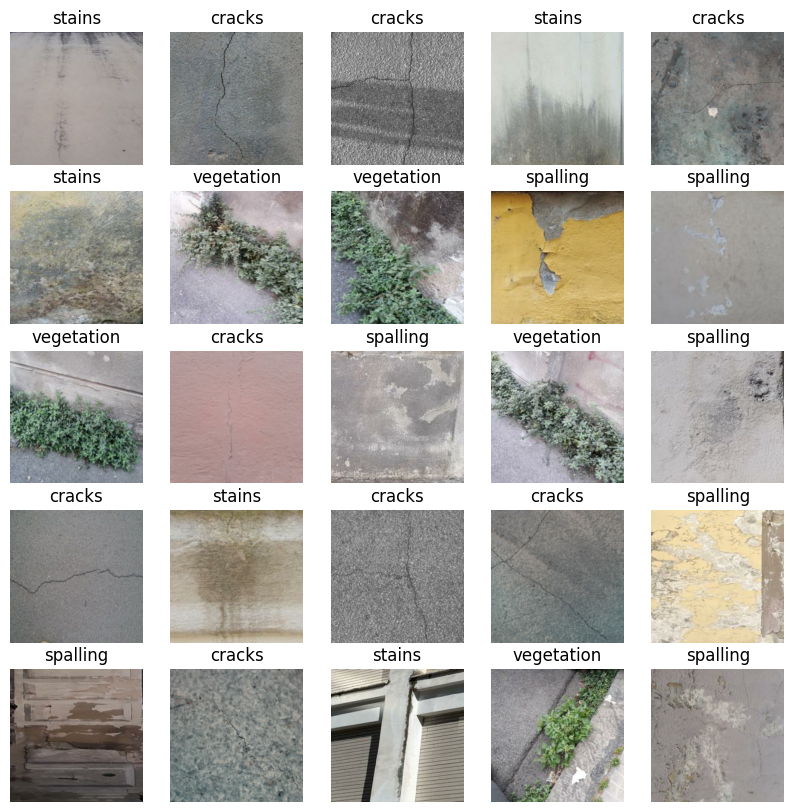

In [75]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())  #unbatching the data to visualize it
show_25_images(train_images, train_labels)

## Step2: Creating and training a Model


In [76]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_train_labels)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5" # this model takes input image of size (224,224) other models may take different size


In [77]:
# Create a function which builds a keras model
import tensorflow_hub as hub
import tf_keras as keras  # tensorflow hub is compatible with keras2 rather than new keras3 that's why we had to import it and use it instead of tf.keras as tf.keras means keras3

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = keras.Sequential([
    hub.KerasLayer(model_url), # Layer 1 (input layer)
    keras.layers.Dense(units=OUTPUT_SHAPE,      #this line would have given error if I would have used tf.keras as tf.keras means keras3 but tensorflow hub object in previous line isn't compatible with keras3
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [78]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 4)                 4008      
                                                                 
Total params: 5436721 (20.74 MB)
Trainable params: 4008 (15.66 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### Creating callbacks

In [79]:
# Loading TensorBoard notebook extension, it helps to see tensorboard logs in collab notebook iteself
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [80]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/IntegrityLens/Logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return keras.callbacks.TensorBoard(logdir)

In [81]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=4) # stops after 4 rounds of no improvements

In [82]:
NUM_EPOCHS = 20 #@param {type:"slider", min:10, max:100, step:10}

In [83]:
# Build a function to train and return the trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # create a model
  model = create_model()

  # Create new TensorBoard session every time we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  return model

In [84]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/20
54/54 [==============================] - 86s 2s/step - loss: 0.8494 - accuracy: 0.6696 - val_loss: 0.6032 - val_accuracy: 0.7170
Epoch 2/20
54/54 [==============================] - 108s 2s/step - loss: 0.4310 - accuracy: 0.8275 - val_loss: 0.5595 - val_accuracy: 0.7610
Epoch 3/20
54/54 [==============================] - 109s 2s/step - loss: 0.3587 - accuracy: 0.8571 - val_loss: 0.5364 - val_accuracy: 0.7610
Epoch 4/20
54/54 [==============================] - 134s 2s/step - loss: 0.3145 - accuracy: 0.8785 - val_loss: 0.5079 - val_accuracy: 0.7799
Epoch 5/20
54/54 [==============================] - 93s 2s/step - loss: 0.2798 - accuracy: 0.8906 - val_loss: 0.4640 - val_accuracy: 0.8239
Epoch 6/20
54/54 [==============================] - 97s 2s/step - loss: 0.2617 - accuracy: 0.8987 - val_loss: 0.4902 - val_accuracy: 0.8176
Epoch 7/20
54/54 [==============================] - 79s 1s/step 

##step 3 Making predictions

In [96]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go

5/5 [==============================] - 5s 1s/step


In [107]:
predictions[120]*100

array([6.0979155e-06, 1.7099515e-05, 1.2964957e-03, 9.9998672e+01],
      dtype=float32)

In [98]:
unique_val_labels

array(['cracks', 'spalling', 'stains', 'vegetation'], dtype=object)

In [101]:
# Check the shape of predictions
predictions.shape

(159, 4)

In [108]:
index=120 #last index
print(f"Predicted label: {unique_val_labels[np.argmax(predictions[index])]}")

Predicted label: vegetation


In [106]:
# Turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_val_labels[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[120])
pred_label

'vegetation'

In [110]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_val_labels[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
# val_images[0],
val_labels[120]

'vegetation'

In [111]:
len(X_test)

160

In [112]:
test_predictions = model.predict(test_data,verbose=1)

5/5 [==============================] - 7s 1s/step


## Making predictions on custom image

In [121]:
custom_path="/content/drive/MyDrive/IntegrityLens/CustomImages/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['/content/drive/MyDrive/IntegrityLens/CustomImages/vegetation.jpeg',
 '/content/drive/MyDrive/IntegrityLens/CustomImages/crack.jpeg']

In [114]:
# Turn custom image into batch
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [115]:
custom_preds = model.predict(custom_data)
custom_preds[0] #predictions for first image

1/1 [==============================] - 1s 507ms/step


array([3.3235838e-06, 5.4086820e-05, 6.5884041e-04, 9.9928373e-01],
      dtype=float32)

In [116]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['vegetation', 'cracks']

## step4 Saving Model and reloading it

In [117]:
def save_model(model, suffix=None):

  # Create model directory with current time
  modeldir = os.path.join("drive/MyDrive/IntegrityLens/Models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [118]:
def load_model(model_path):

  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [119]:
save_model(model, suffix="mobilenetv2-Adam")

Saving model to: drive/MyDrive/IntegrityLens/Models/20251229-14181767017912-mobilenetv2-Adam.h5...


/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/IntegrityLens/Models/20251229-14181767017912-mobilenetv2-Adam.h5'